In [68]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
import seaborn as sns

In [69]:
global mu10,mu20,mu1,mu2,gamma,D,eta,kappa

In [70]:
def TwoSpeciesHGT(t,y):
    s1=y[0]
    s2=y[1]
    p1=y[2]
    p2=y[3]
    lambda1=mu1/mu10-1
    lambda2=mu2/mu20-1
    dydt=[mu1/s1*(s1+lambda2*p1)*s1*(1-s1-gamma*s2)-D*s1,
        mu2/s2*(s2+lambda1*p2)*s2*(1-gamma*s1-s2)-D*s2,
        mu1*(1+lambda2)*p1*(1-s1-gamma*s2)+eta*(s2+p1)*(s1-p1)-kappa*p1-D*p1,
        mu2*(1+lambda1)*p2*(1-gamma*s1-s2)+eta*(s1+p2)*(s2-p2)-kappa*p2-D*p2]
    return dydt

In [71]:
gamma=1.1
D=0.2
kappa=0.005
mu1=0.4
mu2=0.6
mu10=0.5
mu20=0.5
timespan=np.arange(0,200.1,0.1)
num=100;

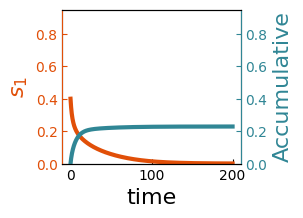

In [72]:
eta=0.2
fig,ax1=plt.subplots(figsize=(2.3,2))
initialHGT=[0.4,0.6,0,0]
sol=solve_ivp(TwoSpeciesHGT,[0,max(timespan)],initialHGT,method='RK45',t_eval=timespan)
y1=np.transpose(sol.y)
S1Abun=y1[:,0]
S2Abun=y1[:,1]
P1Abun=y1[:,2]
P2Abun=y1[:,3]

TT=np.multiply(S1Abun-P1Abun,P1Abun+S2Abun)
Accu=np.zeros(len(timespan))
for i in range(len(timespan)):
    Accu[i]=eta*(timespan[1]-timespan[0])*np.sum(TT[0:i])
ax1.plot(timespan,S1Abun,'-',linewidth=3,color='#E14F08')
ax2=ax1.twinx()
ax2.plot(timespan,Accu,'-',linewidth=3,color='#308695')

ax1.set_xlabel('time',fontsize=16)
ax1.set_ylabel('$s_1$',fontsize=16)
ax1.tick_params(direction='in')
ax1.set_ylim(0,0.95)
ax1.yaxis.label.set_color('#E14F08')
ax1.tick_params(axis='y',colors='#E14F08')
ax2.spines['left'].set_color('#E14F08')

ax2.set_ylabel('Accumulative',fontsize=16)
ax2.tick_params(direction='in',labelcolor='#308695')
ax2.set_ylim(0,0.95)
ax2.yaxis.label.set_color('#308695')
ax2.tick_params(axis='y',colors='#308695')
ax2.spines['right'].set_color('#308695')

plt.savefig('SeesawModelSupplement_1.pdf')
plt.show()

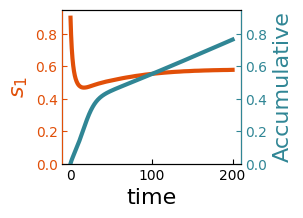

In [73]:
eta=0.2
fig,ax1=plt.subplots(figsize=(2.3,2))
initialHGT=[0.9,0.1,0,0]
sol=solve_ivp(TwoSpeciesHGT,[0,max(timespan)],initialHGT,method='RK45',t_eval=timespan)
y1=np.transpose(sol.y)
S1Abun=y1[:,0]
S2Abun=y1[:,1]
P1Abun=y1[:,2]
P2Abun=y1[:,3]

TT=np.multiply(S1Abun-P1Abun,P1Abun+S2Abun)
Accu=np.zeros(len(timespan))
for i in range(len(timespan)):
    Accu[i]=eta*(timespan[1]-timespan[0])*np.sum(TT[0:i])
ax1.plot(timespan,S1Abun,'-',linewidth=3,color='#E14F08')
ax2=ax1.twinx()
ax2.plot(timespan,Accu,'-',linewidth=3,color='#308695')

ax1.set_xlabel('time',fontsize=16)
ax1.set_ylabel('$s_1$',fontsize=16)
ax1.tick_params(direction='in')
ax1.set_ylim(0,0.95)
ax1.yaxis.label.set_color('#E14F08')
ax1.tick_params(axis='y',colors='#E14F08')
ax2.spines['left'].set_color('#E14F08')

ax2.set_ylabel('Accumulative',fontsize=16)
ax2.tick_params(direction='in',labelcolor='#308695')
ax2.set_ylim(0,0.95)
ax2.yaxis.label.set_color('#308695')
ax2.tick_params(axis='y',colors='#308695')
ax2.spines['right'].set_color('#308695')

plt.savefig('SeesawModelSupplement_2.pdf')
plt.show()